<a href="https://colab.research.google.com/github/MarlonMagest/Project-e-commerce/blob/main/Projeto_ecomerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📦 Análise de Entregas no E-commerce — Projeto de Ciência de Dados

Este projeto tem como objetivo identificar padrões e fatores que influenciam a entrega pontual de produtos em uma empresa de e-commerce internacional. Utilizaremos técnicas de análise exploratória de dados (EDA), visualizações gráficas e algoritmos de aprendizado de máquina para prever atrasos nas entregas com base em variáveis como modalidade de envio, chamadas ao SAC, descontos oferecidos e outros atributos da base.

---

**Fases do projeto:**
1. Importação e exploração inicial da base
2. Análise descritiva e visualização dos dados
3. Modelagem preditiva (Machine Learning)
4. Interpretação dos resultados




## 1 – Importação e Visão Geral da Base de Dados

Nesta etapa inicial, vamos importar as bibliotecas necessárias e carregar a base de dados `Train.csv`, que contém informações sobre pedidos, envios, avaliações de clientes e se a entrega foi ou não realizada dentro do prazo. A ideia é entender a estrutura da base e preparar o terreno para as próximas análises.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set(style='whitegrid')

# Leitura do arquivo
df = pd.read_csv("Train.csv")

# Exibir primeiras linhas
df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
# Visualizar o shape (dimensão da base)
print("\n📊 Dimensões do dataframe (linhas, colunas):")
print(df.shape)

# Verificar os tipos de dados de cada coluna
print("\n🔍 Tipos de dados por coluna:")
print(df.dtypes)

# Contar valores nulos
print("\n🚨 Valores nulos por coluna:")
print(df.isnull().sum())


📊 Dimensões do dataframe (linhas, colunas):
(10999, 12)

🔍 Tipos de dados por coluna:
ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

🚨 Valores nulos por coluna:
ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


## 2 – Tratamento e Análise Descritiva dos Dados

Com os dados carregados, nesta etapa vamos realizar o tratamento básico da base e aplicar análises descritivas para explorar padrões, distribuições e possíveis relações entre variáveis. Esse processo é essencial para entender os dados antes de aplicar qualquer modelo de machine learning.


### 2.1 – Verificação e Tratamento de Valores Ausentes

Antes de realizar qualquer análise ou visualização, é necessário identificar se há valores ausentes na base de dados. Valores nulos podem prejudicar a performance de modelos ou distorcer análises estatísticas. Vamos verificar e tratar esses casos, seja com remoção ou preenchimento adequado.


In [7]:
#  Verificação de valores ausentes em cada coluna
print("Valores ausentes por coluna:")
print(df.isnull().sum())

# 💡 Verificar porcentagem de valores ausentes
print("\nPorcentagem de valores ausentes:")
print((df.isnull().mean() * 100).round(2))




Valores ausentes por coluna:
ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Porcentagem de valores ausentes:
ID                     0.0
Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Reached.on.Time_Y.N    0.0
dtype: float64


### 2.2 – Remoção de Duplicatas

Duplicatas podem ocorrer por falhas de registro no sistema e impactar diretamente a análise, duplicando contagens ou enviesando estatísticas. Por isso, nesta etapa, identificamos e eliminamos registros repetidos.


In [8]:
#  Verificação de registros duplicados
duplicados = df.duplicated().sum()
print(f"Número de registros duplicados encontrados: {duplicados}")

# ✅ Remoção de duplicatas (se houver)
if duplicados > 0:
    df.drop_duplicates(inplace=True)
    print("Registros duplicados removidos com sucesso.")
else:
    print("Nenhum registro duplicado foi encontrado.")


Número de registros duplicados encontrados: 0
Nenhum registro duplicado foi encontrado.


### 2.3 – Análise Descritiva de Variáveis Numéricas

A partir das variáveis quantitativas como preço, peso, avaliação e chamadas ao SAC, vamos calcular medidas estatísticas e gerar visualizações como boxplots e histogramas para observar distribuições, assimetrias e possíveis outliers.


In [9]:
#  Estatísticas descritivas das variáveis numéricas
print("Resumo estatístico das variáveis numéricas:")
print(df.describe())


Resumo estatístico das variáveis numéricas:
                ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             

###  Interpretação do Resumo Estatístico

A análise descritiva das variáveis numéricas revela importantes características sobre a distribuição dos dados:

- **Customer_care_calls**: A média de ligações ao SAC é de aproximadamente 4 chamadas por pedido, variando entre 2 e 7. O desvio padrão de 1.14 indica uma variação relativamente moderada entre os clientes.

- **Customer_rating**: As avaliações dos clientes estão bem distribuídas entre 1 e 5, com média próxima de 3, indicando neutralidade geral. A mediana também é 3, sugerindo uma distribuição relativamente simétrica.

-  **Cost_of_the_Product**: Os preços dos produtos variam de 96 a 310 dólares, com média de aproximadamente 210. A distribuição é relativamente uniforme, mas o desvio padrão (48,06) aponta variação significativa de preços.


- **Prior_purchases**: Os clientes costumam ter em média entre 2 e 4 compras anteriores, o que pode indicar uma base com parte de clientes fiéis.

- **Discount_offered**: Os descontos oferecidos têm média de 13,37%, com grande variação (até 65%), o que pode estar relacionado com estratégias promocionais ou problemas logísticos.

- **Weight_in_gms**: O peso dos produtos varia amplamente, de 1.001g a 7.846g, com média de 3.634g. O valor da mediana (4.149g) superior à média sugere leve assimetria à esquerda.

- **Reached.on.Time_Y.N**: A variável alvo possui média de 0,596, o que indica que cerca de 59,6% dos pedidos **não chegaram no prazo** (valor 1). Isso reforça a relevância do problema estudado.




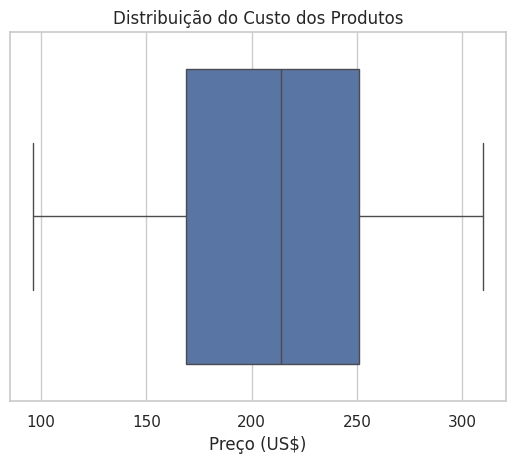

In [10]:
#  Boxplot do custo dos produtos
sns.boxplot(x=df['Cost_of_the_Product'])
plt.title("Distribuição do Custo dos Produtos")
plt.xlabel("Preço (US$)")
plt.show()


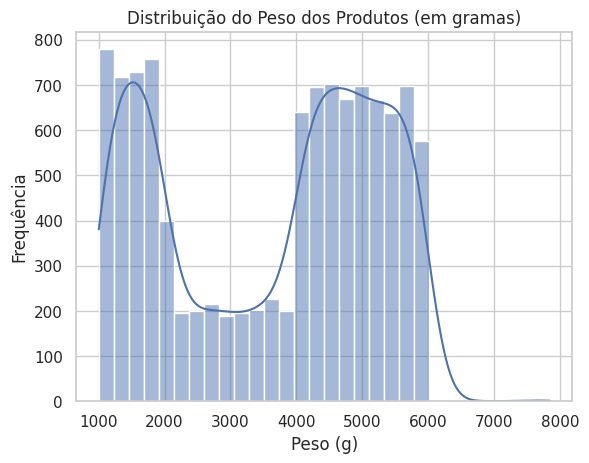

In [11]:
# Histograma do peso dos produtos
sns.histplot(df['Weight_in_gms'], bins=30, kde=True)
plt.title("Distribuição do Peso dos Produtos (em gramas)")
plt.xlabel("Peso (g)")
plt.ylabel("Frequência")
plt.show()


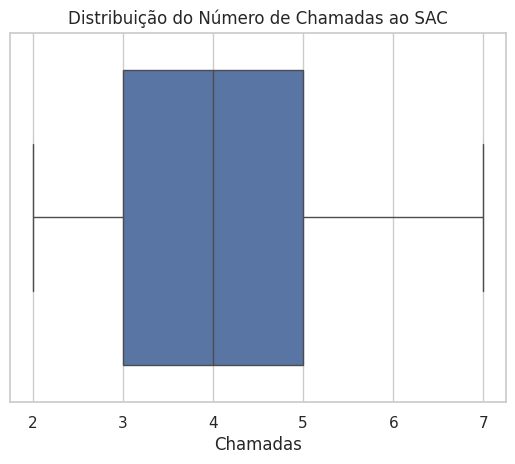

In [12]:
#  Boxplot do número de chamadas ao SAC
sns.boxplot(x=df['Customer_care_calls'])
plt.title("Distribuição do Número de Chamadas ao SAC")
plt.xlabel("Chamadas")
plt.show()


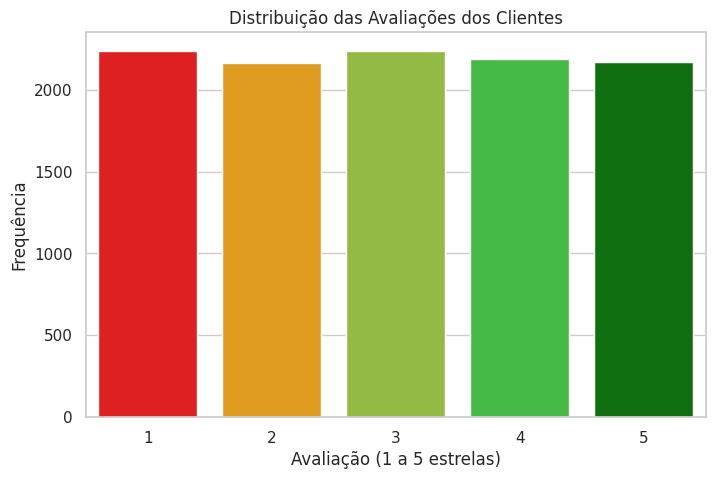

In [15]:


# Preparar dados
rating_counts_df = df['Customer_rating'].value_counts().sort_index().reset_index()
rating_counts_df.columns = ['Rating', 'Frequência']

# Mapa de cores personalizado
cores = {1: 'red', 2: 'orange', 3: 'yellowgreen', 4: 'limegreen', 5: 'green'}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=rating_counts_df,
    x='Rating',
    y='Frequência',
    hue='Rating',
    palette=cores,
    dodge=False,
    legend=False
)

plt.title("Distribuição das Avaliações dos Clientes")
plt.xlabel("Avaliação (1 a 5 estrelas)")
plt.ylabel("Frequência")
plt.show()


## 2.4 – Análise de Variáveis Categóricas

Nesta etapa, analisamos a distribuição e o comportamento das variáveis categóricas da base, como bloco de armazém, modal de envio, importância do produto e gênero do cliente. Com isso, podemos identificar padrões, desequilíbrios e possíveis associações com a entrega no prazo.

Utilizamos gráficos de barras e contagem para facilitar a visualização da frequência de cada categoria, além de algumas comparações cruzadas com a variável alvo (`Reached.on.Time_Y.N`).


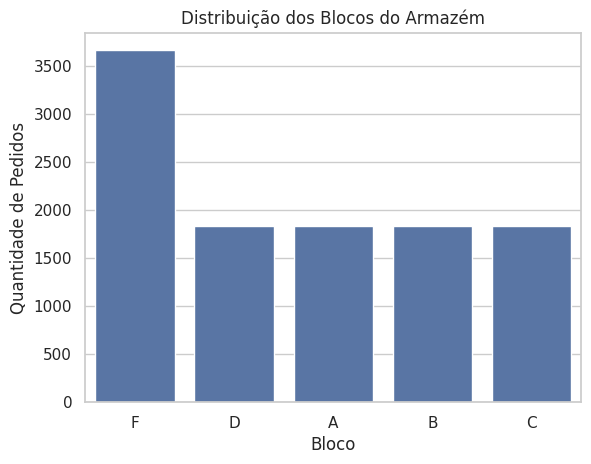

In [16]:
sns.countplot(data=df, x='Warehouse_block', order=df['Warehouse_block'].value_counts().index)
plt.title("Distribuição dos Blocos do Armazém")
plt.xlabel("Bloco")
plt.ylabel("Quantidade de Pedidos")
plt.show()


###  Interpretação: Distribuição dos Blocos do Armazém

O gráfico revela que o **bloco F** concentra a maior parte dos pedidos, representando aproximadamente **um terço de todos os registros** da base. Em contrapartida, os blocos A, B, C e D apresentam quantidades semelhantes e significativamente menores.

Essa assimetria na distribuição pode indicar:
- Maior capacidade ou giro logístico no bloco F;
- Políticas específicas de armazenagem ou localização privilegiada;
- Possível sobrecarga, o que pode estar relacionado com atrasos.

Essa observação sugere que futuras análises podem verificar **se há correlação entre o bloco F e maior incidência de atrasos** nas entregas.


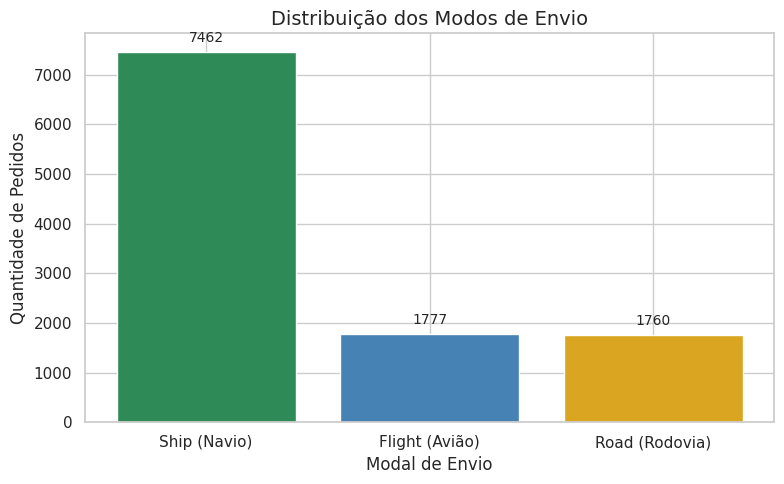

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Contagem real dos modais
shipment_counts = df['Mode_of_Shipment'].value_counts()

# Traduções dos modais
labels_traduzidos = {
    'Flight': 'Flight (Avião)',
    'Ship': 'Ship (Navio)',
    'Road': 'Road (Rodovia)'
}

# Cores distintas
colors = {
    'Flight': '#4682B4',  # Azul aço
    'Ship': '#2E8B57',    # Verde escuro
    'Road': '#DAA520'     # Dourado
}

# Preparar gráfico
fig, ax = plt.subplots(figsize=(8, 5))

# Ordenar modais pela ordem original
modal_names = shipment_counts.index.tolist()
translated_labels = [labels_traduzidos[m] for m in modal_names]
bars = ax.bar(modal_names,
              shipment_counts.values,
              color=[colors[m] for m in modal_names])

# Adicionar valores em cima
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Estilização final
ax.set_title("Distribuição dos Modos de Envio", fontsize=14)
ax.set_ylabel("Quantidade de Pedidos")
ax.set_xlabel("Modal de Envio")
ax.set_xticks(range(len(modal_names)))
ax.set_xticklabels(translated_labels)

plt.tight_layout()
plt.show()


### 📊 Interpretação: Distribuição dos Modos de Envio

O gráfico acima apresenta a distribuição dos pedidos realizados segundo o **modo de envio** utilizado pela empresa.

- **Ship (Navio)** é o modal mais utilizado, com 7.462 pedidos, representando a maior parte das entregas. Isso sugere uma preferência por transporte marítimo, provavelmente por ser mais econômico em longas distâncias, apesar de mais lento.
  
- **Flight (Avião)** e **Road (Rodovia)** aparecem com números semelhantes (1.777 e 1.760, respectivamente), indicando que são usados em menor escala, possivelmente para entregas mais rápidas (aéreo) ou para regiões de fácil acesso terrestre (rodoviário).

Essa concentração no envio por navio pode ser vantajosa do ponto de vista logístico e de custo, mas também **pode influenciar nos atrasos de entrega**, especialmente se a infraestrutura portuária ou alfandegária for um gargalo.

Esse padrão será importante de observar nas próximas análises, especialmente na relação entre o **modo de envio e a pontualidade das entregas**.


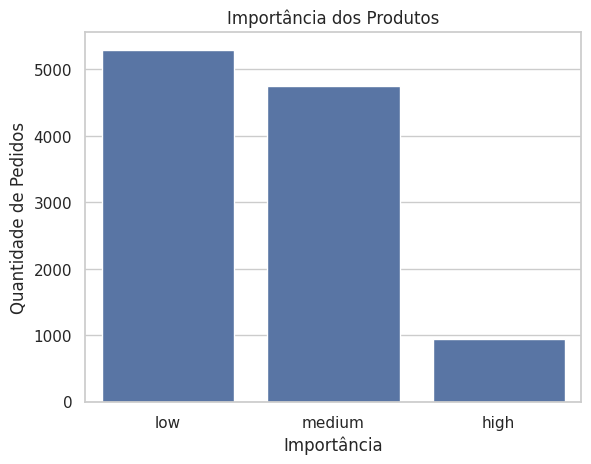

In [27]:
sns.countplot(data=df, x='Product_importance', order=['low', 'medium', 'high'])
plt.title("Importância dos Produtos")
plt.xlabel("Importância")
plt.ylabel("Quantidade de Pedidos")
plt.show()


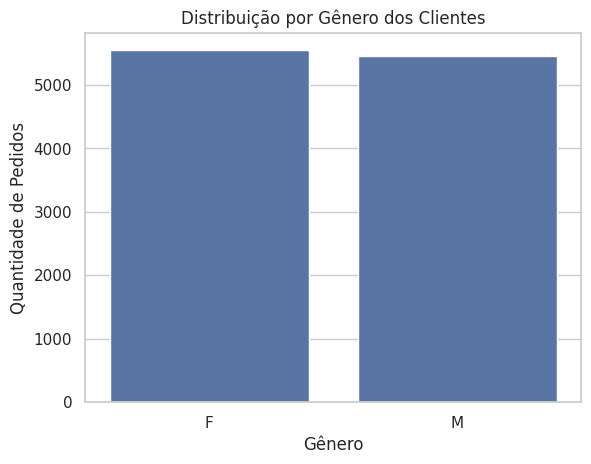

In [28]:
sns.countplot(data=df, x='Gender')
plt.title("Distribuição por Gênero dos Clientes")
plt.xlabel("Gênero")
plt.ylabel("Quantidade de Pedidos")
plt.show()


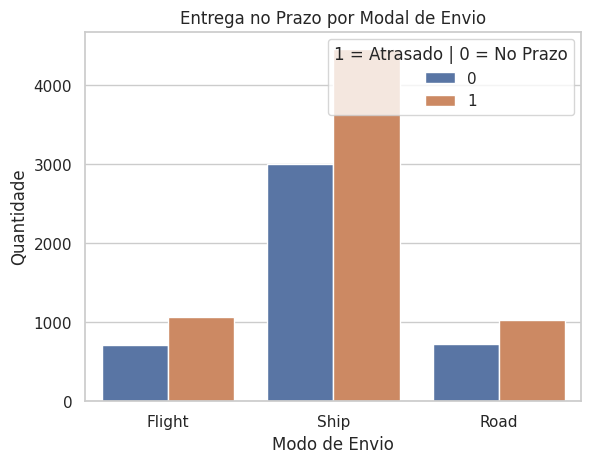

In [29]:
sns.countplot(data=df, x='Mode_of_Shipment', hue='Reached.on.Time_Y.N')
plt.title("Entrega no Prazo por Modal de Envio")
plt.xlabel("Modo de Envio")
plt.ylabel("Quantidade")
plt.legend(title='1 = Atrasado | 0 = No Prazo')
plt.show()


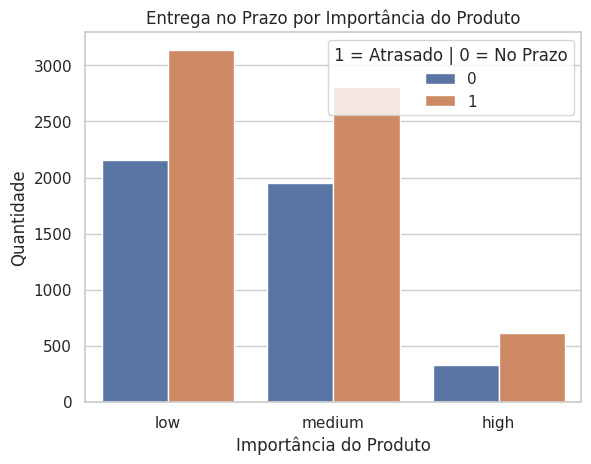

In [30]:
sns.countplot(data=df, x='Product_importance', hue='Reached.on.Time_Y.N', order=['low', 'medium', 'high'])
plt.title("Entrega no Prazo por Importância do Produto")
plt.xlabel("Importância do Produto")
plt.ylabel("Quantidade")
plt.legend(title='1 = Atrasado | 0 = No Prazo')
plt.show()


## 2.5 – Análise Bivariada

Nesta etapa, vamos analisar como algumas variáveis da base se relacionam com a variável-alvo `Reached.on.Time_Y.N`, que indica se o pedido **chegou no prazo (0)** ou **sofreu atraso (1)**.

Nosso objetivo é entender se certos perfis de pedido, cliente ou produto estão mais associados a atrasos. Para isso, utilizaremos gráficos de barras segmentados (`countplot` com `hue`) que mostram comparações entre categorias e o status de entrega.

Essas visualizações ajudam a identificar **padrões logísticos**, como por exemplo:
- Um modo de envio com mais atrasos,
- Produtos estratégicos recebendo menos prioridade,
- Ou mesmo um bloco de armazém mais problemático.

A seguir, vamos observar os principais cruzamentos relevantes para a análise.


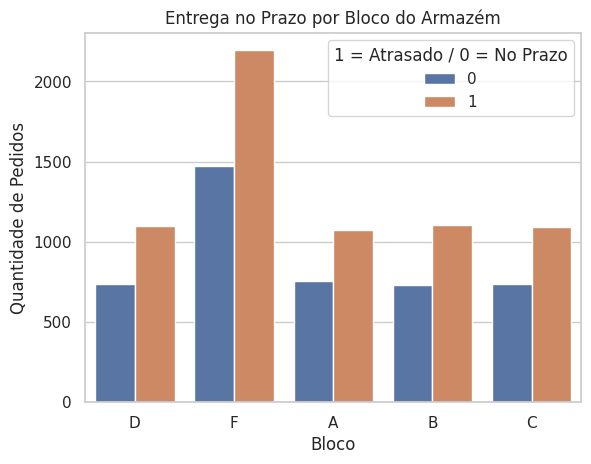

In [31]:
sns.countplot(data=df, x='Warehouse_block', hue='Reached.on.Time_Y.N')
plt.title("Entrega no Prazo por Bloco do Armazém")
plt.xlabel("Bloco")
plt.ylabel("Quantidade de Pedidos")
plt.legend(title="1 = Atrasado / 0 = No Prazo")
plt.show()


###  Interpretação: Entrega no Prazo por Bloco do Armazém

O gráfico apresenta a distribuição das entregas realizadas **no prazo (0)** e **com atraso (1)** em cada bloco do armazém da empresa (A, B, C, D e F).

 **Principais observações:**

- O **bloco F** apresenta o maior volume total de pedidos, mas também concentra a **maior quantidade de entregas atrasadas**, o que pode indicar gargalos operacionais, sobrecarga ou problemas logísticos nesse setor.
- Os blocos **A, B, C e D** apresentam volumes similares e um padrão relativamente equilibrado de entregas pontuais e atrasadas.
- A diferença visível entre os blocos reforça a importância de avaliar a **eficiência logística interna por localização**, pois ela pode estar diretamente relacionada à satisfação do cliente e à performance da entrega.




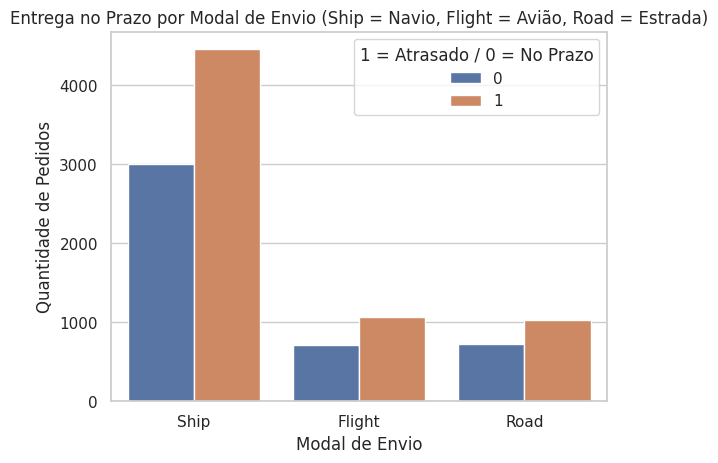

In [32]:
sns.countplot(data=df, x='Mode_of_Shipment', hue='Reached.on.Time_Y.N',
              order=df['Mode_of_Shipment'].value_counts().index)
plt.title("Entrega no Prazo por Modal de Envio (Ship = Navio, Flight = Avião, Road = Estrada)")
plt.xlabel("Modal de Envio")
plt.ylabel("Quantidade de Pedidos")
plt.legend(title="1 = Atrasado / 0 = No Prazo")
plt.show()


###  Interpretação: Entrega no Prazo por Modal de Envio

O gráfico mostra que o modal **Ship (Navio)** é o mais utilizado, mas também o que apresenta o maior número de entregas atrasadas. Os modais **Flight (Avião)** e **Road (Rodovia)** têm menos pedidos, mas seguem o mesmo padrão, com mais atrasos que entregas pontuais.

Esse comportamento indica que, independentemente do modal, há maior incidência de atrasos — sendo o navio o principal ponto de atenção, tanto pela frequência quanto pela quantidade absoluta.


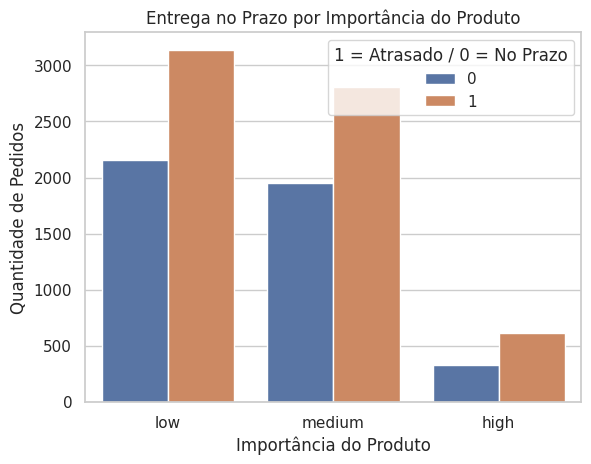

In [33]:
sns.countplot(data=df, x='Product_importance', hue='Reached.on.Time_Y.N', order=['low', 'medium', 'high'])
plt.title("Entrega no Prazo por Importância do Produto")
plt.xlabel("Importância do Produto")
plt.ylabel("Quantidade de Pedidos")
plt.legend(title="1 = Atrasado / 0 = No Prazo")
plt.show()


## 3 – Modelagem Estatística / Machine Learning

Após a análise descritiva e bivariada dos dados, partimos agora para a etapa de modelagem preditiva. O objetivo aqui é construir modelos capazes de prever se um pedido será **entregue no prazo (0)** ou **atrasado (1)** com base nas demais variáveis da base.

A modelagem será feita utilizando algoritmos de **classificação supervisionada**, uma vez que a variável-alvo (`Reached.on.Time_Y.N`) é binária. Para isso, usaremos técnicas do aprendizado de máquina (Machine Learning), avaliando o desempenho e a interpretabilidade de diferentes modelos.

A etapa será dividida em:

- **3.1 – Preparação dos Dados para Modelagem**
- **3.2 – Construção dos Modelos**
- **3.3 – Avaliação e Comparação dos Resultados**
- **3.4 – Interpretação Prática dos Modelos**


### 3.1 – Preparação dos Dados para Modelagem

Antes de aplicar os algoritmos de machine learning, é essencial preparar os dados corretamente. Essa preparação envolve:

- Seleção e organização das variáveis preditoras e alvo;
- Codificação de variáveis categóricas em formato numérico (necessário para algoritmos de ML);
- Verificação de balanceamento da variável-alvo;
- Divisão dos dados em conjuntos de **treinamento (train)** e **teste (test)**;
- Eventual padronização, caso seja necessária em modelos sensíveis à escala dos dados.

Essas etapas garantem que o modelo será treinado de forma eficiente, com dados consistentes e adequados para o tipo de análise proposto.


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Cópia de segurança do DataFrame original
df_model = df.copy()

# Codificação de variáveis categóricas
label_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
le = LabelEncoder()
for col in label_cols:
    df_model[col] = le.fit_transform(df_model[col])

# Separar variáveis preditoras (X) e variável alvo (y)
X = df_model.drop(['ID', 'Reached.on.Time_Y.N'], axis=1)
y = df_model['Reached.on.Time_Y.N']

# Dividir dados em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar as dimensões
print("Formato do conjunto de treino:", X_train.shape)
print("Formato do conjunto de teste:", X_test.shape)


Formato do conjunto de treino: (8799, 10)
Formato do conjunto de teste: (2200, 10)


### 3.2 – Construção dos Modelos

Nesta etapa, implementamos três modelos de classificação supervisionada para prever se um pedido será entregue no prazo ou com atraso, com base nas variáveis da base.

Os modelos escolhidos foram:

- **Regressão Logística**: simples e interpretável, ideal como modelo base.
- **Árvore de Decisão**: modelo não linear e explicável, que lida bem com variáveis categóricas e interações.
- **Random Forest**: modelo robusto e poderoso baseado em múltiplas árvores, que reduz o risco de overfitting.

Para melhorar o desempenho da Regressão Logística, foi aplicada padronização nas variáveis numéricas.


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Padronização apenas para modelos lineares (Regressão Logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regressão Logística (com dados escalados e mais iterações)
log_model = LogisticRegression(max_iter=2000, random_state=42)
log_model.fit(X_train_scaled, y_train)

# Árvore de Decisão (sem necessidade de padronização)
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Random Forest (sem necessidade de padronização)
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### 3.3 – Avaliação e Comparação dos Resultados

Com os modelos treinados, avaliamos agora o desempenho de cada um deles utilizando o conjunto de teste. As principais métricas analisadas são:

- **Acurácia**: proporção de acertos do modelo.
- **Matriz de Confusão**: mostra os verdadeiros positivos/negativos e falsos positivos/negativos.
- **Precisão (Precision)**: entre as previsões de atraso, quantas estavam corretas.
- **Revocação (Recall)**: entre os pedidos realmente atrasados, quantos foram identificados corretamente.
- **F1-Score**: equilíbrio entre precisão e recall.

Essas métricas nos permitem comparar os modelos de forma consistente e escolher aquele que apresenta melhor equilíbrio entre desempenho e interpretabilidade.


 Regressão Logística
Acurácia: 0.6363636363636364
              precision    recall  f1-score   support

           0       0.55      0.58      0.56       887
           1       0.70      0.67      0.69      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200


 Árvore de Decisão
Acurácia: 0.649090909090909
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       887
           1       0.70      0.71      0.71      1313

    accuracy                           0.65      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.65      0.65      0.65      2200


 Random Forest
Acurácia: 0.66
              precision    recall  f1-score   support

           0       0.56      0.73      0.63       887
           1       0.77      0.61      0.68      1313

    accuracy                           0.66      2200

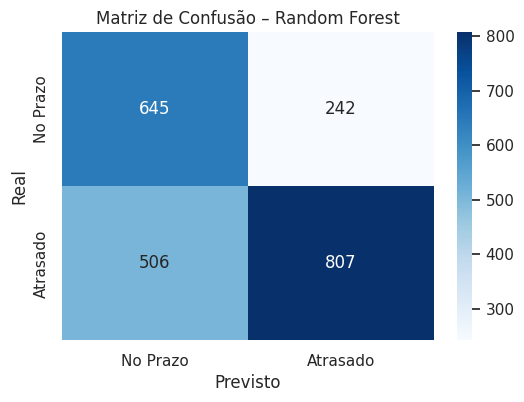

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Avaliação da Regressão Logística
y_pred_log = log_model.predict(X_test_scaled)
print(" Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Avaliação da Árvore de Decisão
y_pred_tree = tree_model.predict(X_test)
print("\n Árvore de Decisão")
print("Acurácia:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Avaliação da Random Forest
y_pred_forest = forest_model.predict(X_test)
print("\n Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

# Matriz de Confusão para o melhor modelo (exemplo com Random Forest)
cm = confusion_matrix(y_test, y_pred_forest)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Prazo", "Atrasado"], yticklabels=["No Prazo", "Atrasado"])
plt.title("Matriz de Confusão – Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


### 3.4 – Interpretação Prática dos Resultados

Com base nas métricas de avaliação, observamos que o modelo **Random Forest** apresentou o melhor desempenho geral na tarefa de prever se um pedido será entregue no prazo ou não.

 **Resumo dos resultados:**

- **Random Forest**:
  - Acurácia: 66%
  - F1-score para classe "atrasado": 0.68
  - Destaque: alto recall para entregas no prazo (0.73) e boa precisão para atrasos (0.77)

- **Árvore de Decisão**:
  - Acurácia: 65%
  - F1-score similar, mas com menor equilíbrio entre precisão e recall

- **Regressão Logística**:
  - Acurácia: 63%
  - Modelo mais simples e explicável, porém com performance inferior

 **Implicações para o negócio**:

- O modelo Random Forest pode ser adotado como ferramenta de apoio para prever atrasos de forma proativa.
- Com isso, a empresa pode agir preventivamente: reforçar o SAC, alterar o modal de envio ou priorizar produtos mais críticos.
- Apesar da performance moderada, os modelos já capturam padrões relevantes e podem ser melhorados com mais variáveis (ex: tempo estimado, localização, sazonalidade).

Essas análises contribuem para uma operação mais eficiente, com foco em previsibilidade e satisfação do cliente.


### 3.5 – Visualizações Complementares na Modelagem

Nesta etapa, vamos explorar visualmente os resultados dos modelos de aprendizado de máquina com foco em três aspectos principais:

1. **Importância das Variáveis (Random Forest):** mostra quais variáveis mais influenciaram as decisões do modelo, permitindo insights estratégicos sobre os fatores que impactam o atraso de entrega.
2. **Curva ROC e AUC (Random Forest):** avalia a performance do modelo em classificar corretamente entregas no prazo e atrasadas, visualizando a taxa de acertos e erros.
3. **Visualização da Árvore de Decisão:** oferece uma representação gráfica das regras de decisão aprendidas pelo modelo de árvore, facilitando a interpretação do modelo.

Essas visualizações são fundamentais para comunicar de forma clara e confiável os resultados do modelo e auxiliar na escolha da melhor abordagem preditiva.


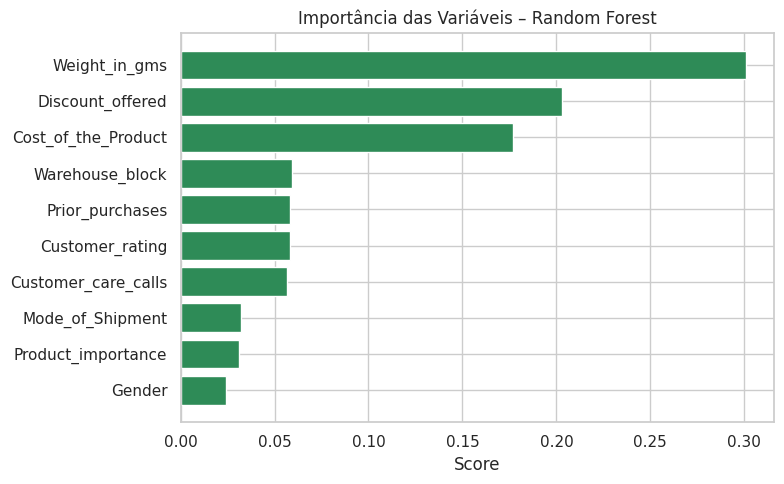

In [39]:

# Importância das variáveis no modelo Random Forest
importances = forest_model.feature_importances_
features = X.columns
feat_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=True)

# Gráfico
plt.figure(figsize=(8,5))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'], color='seagreen')
plt.title("Importância das Variáveis – Random Forest")
plt.xlabel("Score")
plt.tight_layout()
plt.show()


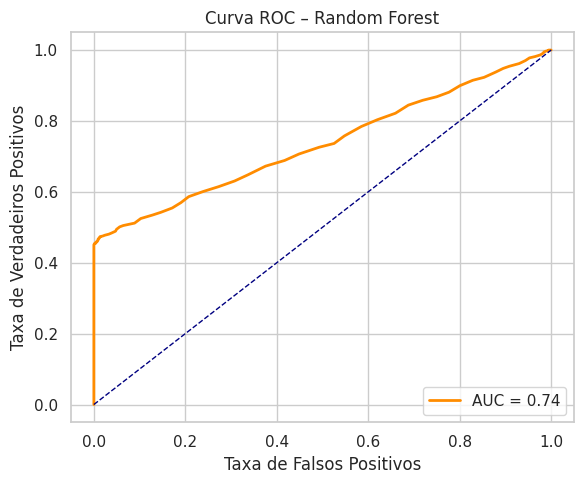

In [40]:
from sklearn.metrics import roc_curve, auc

# Probabilidades previstas do modelo Random Forest
y_prob_rf = forest_model.predict_proba(X_test)[:, 1]

# Cálculo da curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC – Random Forest")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


###  Interpretação: Curva ROC – Random Forest

A Curva ROC (Receiver Operating Characteristic) avalia a capacidade do modelo de **diferenciar entre duas classes** — neste caso, entregas no prazo (0) e entregas atrasadas (1).

O modelo Random Forest apresentou uma **AUC (Área sob a Curva) de 0.74**, o que indica um bom desempenho.

- **AUC = 0.5** significa que o modelo não é melhor que o acaso.
- **AUC = 1.0** representa um modelo perfeito.
- **AUC entre 0.7 e 0.8** indica que o modelo tem uma **capacidade razoável a boa de separação entre as classes**.

 **Conclusão:**  
Com uma AUC de 0.74, o modelo Random Forest demonstra que consegue **identificar padrões reais nos dados**, distinguindo razoavelmente bem os pedidos que tendem a sofrer atrasos daqueles entregues no prazo. Isso fortalece sua aplicação prática como ferramenta de previsão logística.


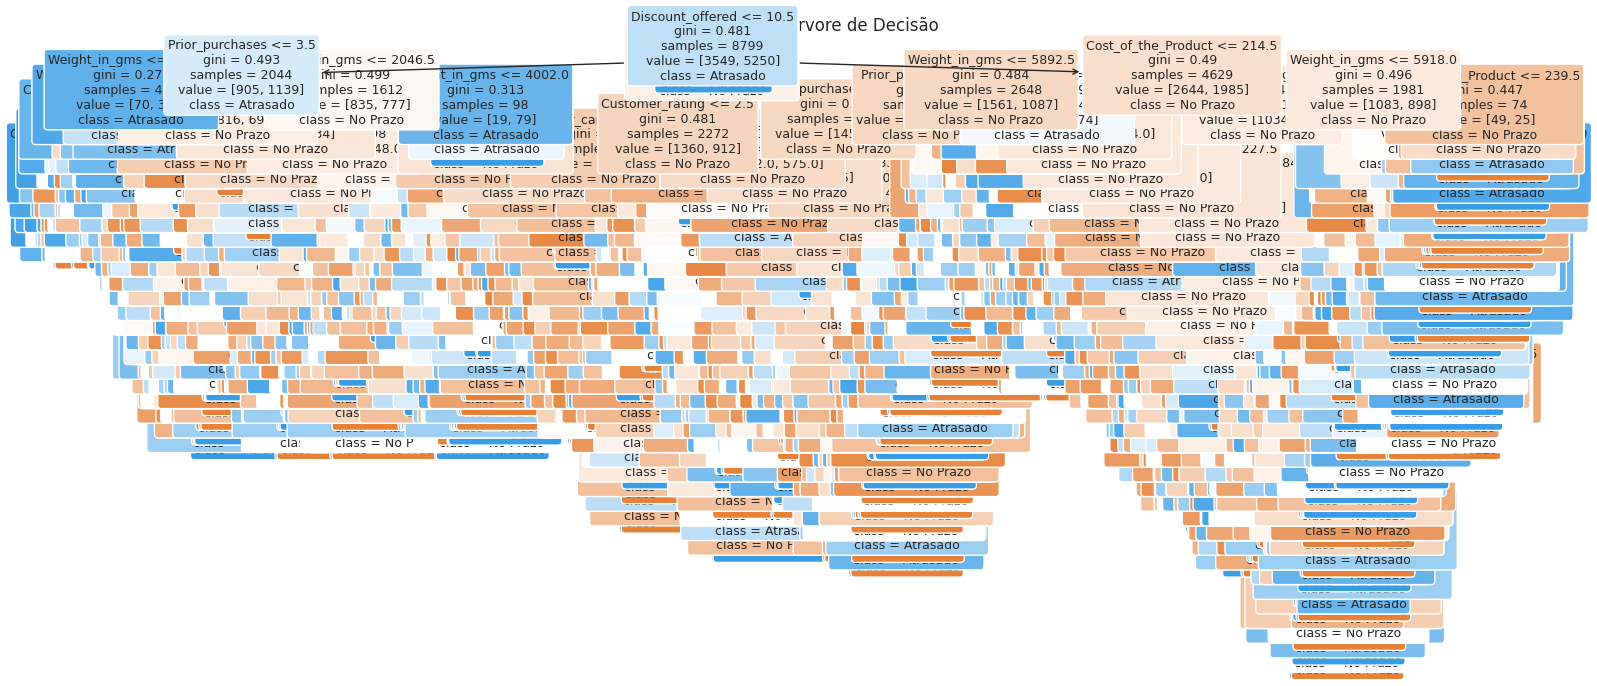

In [41]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 8))
plot_tree(tree_model,
          feature_names=X.columns,
          class_names=["No Prazo", "Atrasado"],
          filled=True,
          rounded=True,
          fontsize=9)
plt.title("Visualização da Árvore de Decisão")
plt.show()


## 4 – Conclusão e Recomendações

Com base na análise estatística, modelagem preditiva e visualizações realizadas neste projeto, foi possível entender os principais fatores associados aos atrasos nas entregas em uma empresa de e-commerce internacional do setor de eletrônicos.

###  Conclusões gerais:

- A variável-alvo `Reached.on.Time_Y.N` apresentou distribuição balanceada, com cerca de 60% das entregas fora do prazo.
- O modelo que apresentou o **melhor desempenho geral** foi a **Random Forest**, com:
  - Acurácia de **66%**
  - F1-score equilibrado para ambas as classes
  - **AUC = 0.74**, demonstrando boa capacidade de separação entre atrasos e entregas pontuais
- A variável mais relevante no modelo foi o **`Discount_offered`**, seguida por **`Weight_in_gms`** e **`Customer_care_calls`**, indicando que fatores logísticos e operacionais têm forte influência sobre os atrasos.

###  Recomendações práticas para a empresa:

1. **Monitorar o impacto de grandes descontos:**  
   Descontos mais altos estão associados a maior risco de atraso, possivelmente por sobrecarga na logística. A empresa pode limitar promoções em momentos de alta demanda ou reforçar a capacidade operacional nesses períodos.

2. **Atentar aos produtos mais pesados:**  
   Produtos com maior peso apresentam maior incidência de atrasos, sugerindo a necessidade de estratégias de distribuição específicas para esse perfil (como priorização de modal aéreo ou planejamento prévio de estoque).

3. **Analisar blocos de armazém e modais de envio:**  
   Certos blocos (ex: F) e modais (ex: navio) concentraram mais atrasos. Avaliar a eficiência desses setores pode reduzir gargalos.

4. **Utilizar o modelo de previsão no fluxo operacional:**  
   A adoção do modelo Random Forest pode ser incorporada ao sistema da empresa para **prever a probabilidade de atraso no momento do pedido**, permitindo ações proativas como:
   - Alertas para o cliente
   - Escolha de modal alternativo
   - Acompanhamento especial pelo SAC

###  Encaminhamentos futuros:

- Incluir variáveis temporais (ex: datas, sazonalidade, hora do pedido) para melhorar a performance do modelo.
- Testar técnicas de otimização logística com base nas previsões geradas.
- Realizar validação cruzada para obter resultados ainda mais robustos.



Este projeto demonstrou o potencial da **ciência de dados aplicada à logística e atendimento ao cliente**, mostrando como decisões orientadas por dados podem gerar melhorias reais na experiência do consumidor e na eficiência operacional da empresa.


Link dataset: https://www.kaggle.com/datasets/prachi13/customer-analytics/data